In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import os


In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [9]:
class viterbi: 
    def __init__(self, path_to_obs:str): 
        """
        Path to Obs is file path to observations 
        """
        self.trans = pd.read_csv("transitionMatrix.txt", sep=" ", usecols=range(27), names=range(27)).to_numpy()
        self.initial  = pd.read_csv("initialStateDistribution.txt", sep=" ", names=["a"]).to_numpy().reshape(27, )
        self.emission =pd.read_csv("emissionMatrix.txt", sep="\t", names=["a", "b"]).to_numpy()
        self.obs = np.array([int(o) for  o in open(path_to_obs).read().strip().split(" ")])
        self.n = self.obs.shape[0]
        self.m = self.trans.shape[0]
        
        # Answers 
        self.res = np.zeros(self.n)
        self.msg = ""
        
        # Test 
        x = self.initial.shape[0]
        assert type(self.obs)  == np.ndarray
        assert len(self.obs.shape) == 1
        assert self.initial.shape == (x,)
        assert self.trans.shape == (x, x)
        assert self.emission.shape[0] == x
    
    def solve(self):
        T = np.zeros((self.n, self.m))
        T[0, :] = np.log(self.initial * self.emission[:, self.obs[0]])

        T2 = np.zeros((self.n - 1, self.m))

        for t in range(1, self.n):
            for j in range(self.m):
                prob = T[t - 1] + np.log(self.trans[:, j]) + np.log(self.emission[j, self.obs[t]])
                T2[t - 1, j] = np.argmax(prob)
                T[t, j] = np.max(prob)

        zt = np.argmax(T[self.n - 1, :])
        self.res[0] = zt

        # Backtrack
        for i, idx in zip(range(self.n - 2, -1, -1), range(1, self.n)):
            self.res[idx] = T2[i, int(zt)]
            zt = T2[i, int(zt)]

        # Flip it back
        self.res = np.flip(self.res, axis=0)
        
        return self.res
    
    def decode(self): 
        assert sum(self.res) != 0
        letters =  [a for a in string.ascii_lowercase] + [" "]
        for x in self.res: 
            l = letters[int(x)]
            if len(list(self.msg)) > 0: 
                if list(self.msg)[-1] != l: 
                     self.msg += l
            else: 
                self.msg += l
        return self.msg
        
        

x = viterbi("observations.txt")
results = x.solve()
x.decode()

'hindsight is always twenty twenty'

Text(0, 0.5, 'Most likely hidden state')

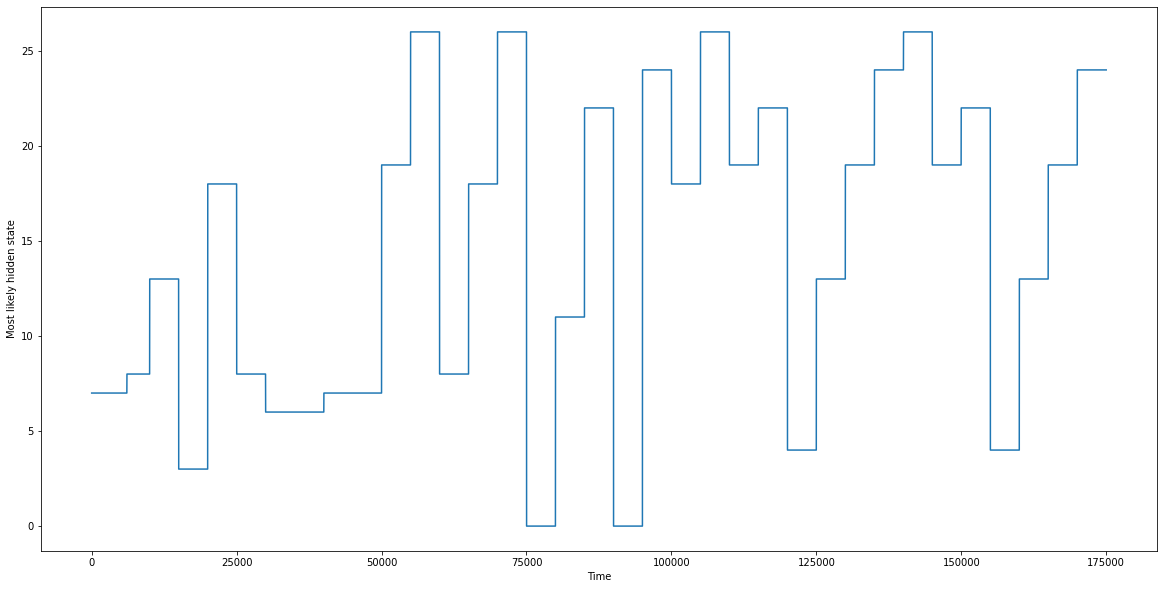

In [12]:
plt.figure(figsize=(20,10))
plt.plot(results)
plt.xlabel("Time")
plt.ylabel("Most likely hidden state")
